#### 로지스틱 회기(Logistic Regression)=>p332~
- 선형 알고리즘에 Sigmoid 함수가 결합된 분류 알고리즘 
- 선형 회귀 방식을 이용한 이진 분류 알고리즘
- 분류 레이블 : 0 or 1
- 0~1 범위를 예측 결과로 갖는 모델 필요
    - 가설 결과에 Sigmoid 함수 적용

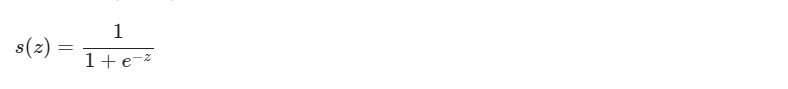

- z값을 0과 1사이의 값으로 바꾸는 함수
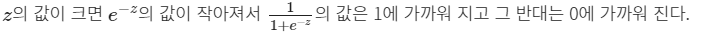

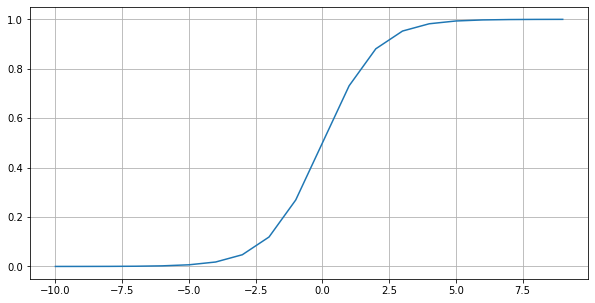

In [3]:
# Sigmoid 함수
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return  1/(1+np.exp(-z))

plt.figure(figsize=(10, 5))
x=np.arange(-10, 10)
y=sigmoid(x)

plt.plot(x, y)
plt.grid(True)
plt.show()

- x가 0보다 크면 y는 0.5 기준 긍정 결과
- x가 0보다 작으면 y는 0.5기준 부정 결과
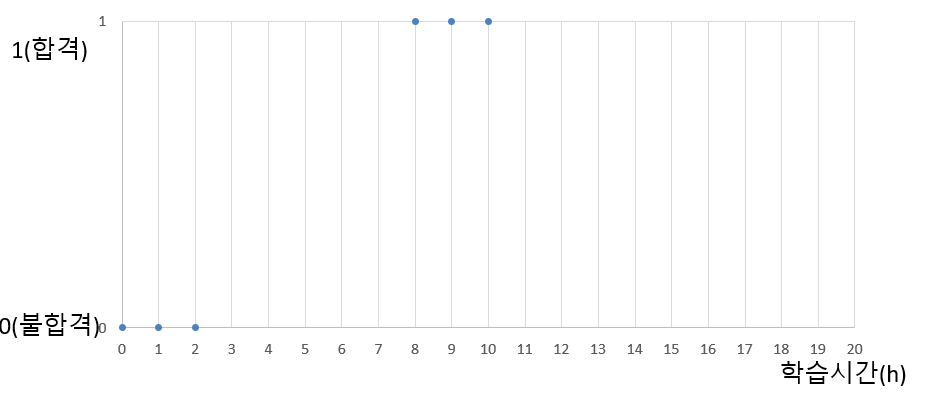

#### 로지스틱 회기
- 데이터 생성

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 샘플 생성(x값 생성)
ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma, 2))
Xb = np.random.randint(0,50, (mb, 2))
x = np.concatenate((Xa, Xb), axis=0).astype(np.float32)/100

In [15]:
# y값 생성
y = np.zeros((m,),dtype=np.float32)
y[mb:] = 1
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

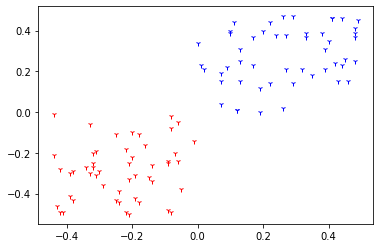

In [16]:
# 시각화
plt.plot(x[y==0][:,0], x[y==0][:, 1], 'r1')
plt.plot(x[y==1][:,0], x[y==1][:, 1], 'b1')

plt.show()

- 로지스틱 회기 적용

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf=LogisticRegression()
lr_clf.fit(x, y)
pred=lr_clf.predict(x)

In [19]:
x.shape

(100, 2)

In [20]:
x[0]

array([-0.09, -0.24], dtype=float32)

In [22]:
accuracy_score(y,pred) # 정확도: 정답을 맞춘 퍼센트율

1.0

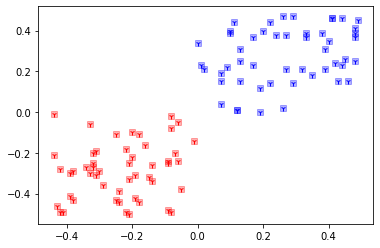

In [25]:
# 시각화
plt.plot(x[y==0][:,0], x[y==0][:, 1], 'r1')
plt.plot(x[y==1][:,0], x[y==1][:, 1], 'b1')

plt.plot(x[pred==0][:,0], x[pred==0][:, 1], 'rs', alpha=0.3)
plt.plot(x[pred==1][:,0], x[pred==1][:, 1], 'bs', alpha=0.3)

plt.show()

In [37]:
print(lr_clf.predict([[0.4, 0.5]])[0])
print(lr_clf.predict([[-0.5, -0.3]])[0])

1.0
0.0


#### 로지스틱 회귀 실습: 위스콘신 유방암 환자

In [43]:
# 필요 모듈 연결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [44]:
# 데이터 셋 로드
from sklearn.datasets import load_breast_cancer
cancar=load_breast_cancer()
cancar.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [47]:
# 데이터 프레임 만들기
df=pd.DataFrame(cancar['data'],columns=cancar['feature_names'])
df['target']=cancar['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [53]:
# 정규화
scaler=StandardScaler()
scaled=scaler.fit_transform(df.drop('target', axis=1))

In [55]:
# train/test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(scaled, df['target'], test_size=0.3, random_state=44)

In [60]:
# 로지스틱 회기 모델 적용
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred= lr_clf.predict(x_test) # 테스트 데이터를 이용한 예측

In [61]:
# 정확도 측정
accuracy_score(y_test,pred)

0.9766081871345029

#### 분류 평가 지표: 오차 행렬 (Confision Matrix)
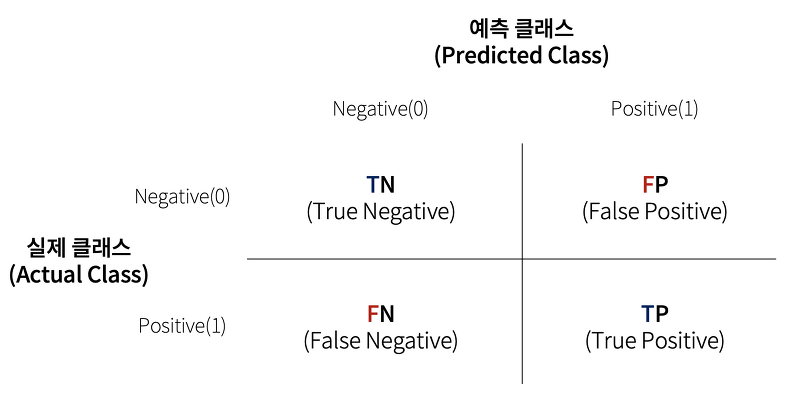

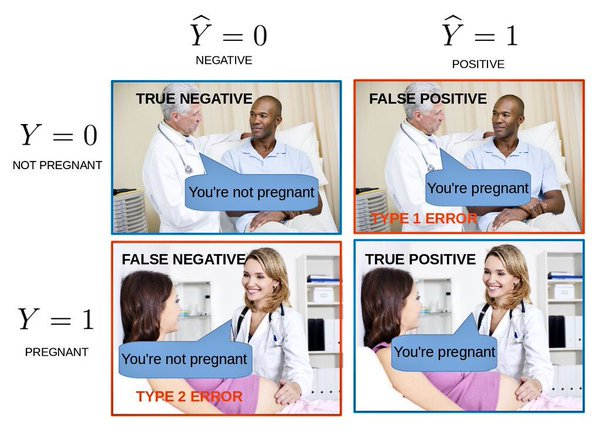

- 정확도: 예측값과 실제값이 얼마나 동일한지에 대한 비율
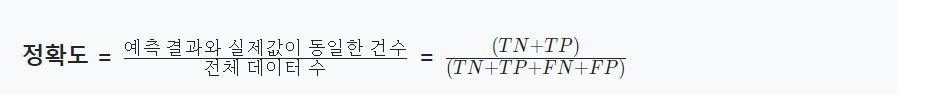

- 정밀도: 예측을 Positive로 한 대상중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
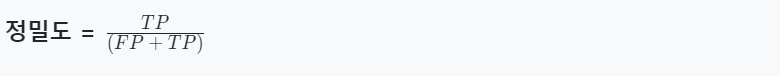

- 재현율: 실제값이 Positive인 대상중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
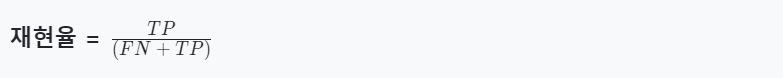

- F1 Score: 재현율과 정밀도의 균형을 나타내는 수치
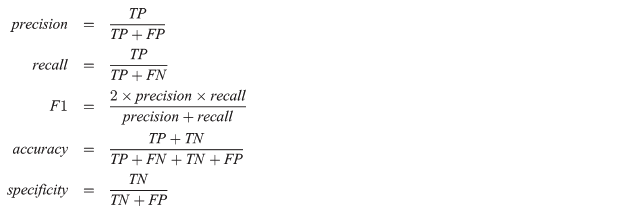

In [67]:
# 오차 행렬 적용
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix

# 정확도 측정
print(accuracy_score(y_test, pred))

# 정밀도 측정
print(precision_score(y_test, pred))

# 재현율 측정
print(recall_score(y_test, pred))

# F1
print(f1_score(y_test, pred))

0.9766081871345029
0.9814814814814815
0.9814814814814815
0.9814814814814815


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 61,   2],
       [  2, 106]])